# SQL Murder Mystery Database

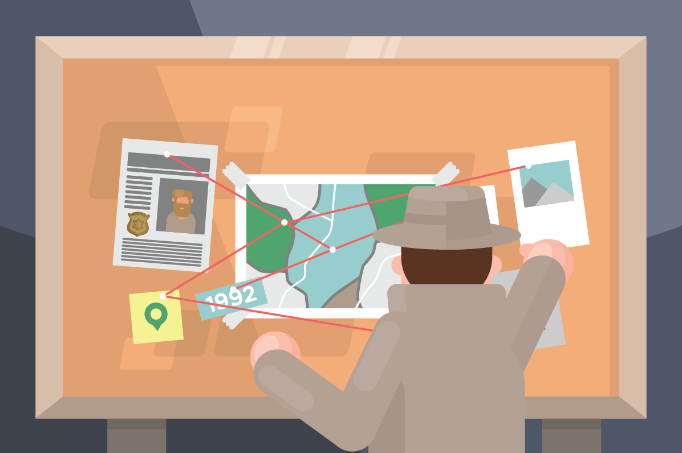


There's been a Murder in SQL City! The SQL Murder Mystery is designed to be both a self-directed lesson to learn SQL concepts and commands and a fun game for experienced SQL users to solve an intriguing crime.

A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a murder that occurred sometime on Jan.15, 2018 and that it took place in SQL City. Start by retrieving the corresponding crime scene report from the police department’s database.

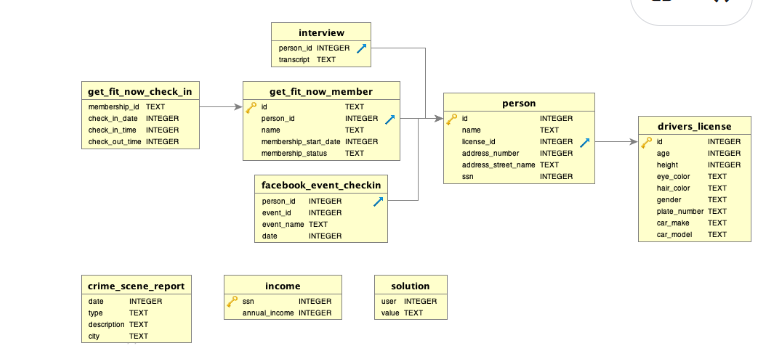

In [1]:
import pandas as pd
import sqlite3 as sql

In [4]:
con = sql.connect('C:\\Users\\Amr mohamed\\SQL\\sql-murder-mystery.db')
con

In [5]:
query_1 = '''
SELECT *
FROM crime_scene_report
WHERE city = "SQL City"
ORDER BY date;
'''
#seting the dataframe width to max
pd.set_option('display.max_colwidth', None)
#running our query
pd.read_sql_query(query_1, con)

,date,type,description,city
0,20170712,theft,"A lone hunter stalks the night, firing arrows into the Darkness.\n There is no hiding, no escape. In the distance, the beast\n falters, tethered to the void. The killing blow comes without\n hesitation, without mercy.",SQL City
1,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it is a thing of\n legend, both past and future.",SQL City
2,20171110,robbery,"The Gjallarhorn shoulder-mounted rocket system was forged from\n the armor of Guardians who fell at the Twilight Gap. Gifted\n to the survivors of that terrible battle, the Gjallarhorn\n is seen as a symbol of honor and survival.",SQL City
3,20180103,bribery,"Apparently, Cayde thought it necessary to expose this extremely\n rare vegetable to a Hive summoning ritual.",SQL City
4,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot him in the side! Yes he yields!",SQL City
5,20180115,assault,Report Not Found,SQL City
6,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City
7,20180215,murder,REDACTED REDACTED REDACTED,SQL City
8,20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City


In [6]:
#checking personal details of both the witnesses
query_2 = '''
SELECT *
FROM person
WHERE address_street_name = "Northwestern Dr"
ORDER BY address_number desc;
'''
pd.read_sql_query(query_2, con)[:1]

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [7]:
query_3 = '''
SELECT *
FROM person
WHERE name like '%Annabel%' AND address_street_name = "Franklin Ave";
'''
pd.read_sql_query(query_3, con)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [8]:
#lets view the interview of both the witnesses taken after the murder.
query_4 = '''
SELECT *
FROM interview
WHERE person_id = 14887 OR person_id = 16371;
'''
pd.read_sql_query(query_4, con)

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."
1,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


In [9]:
#Checking the gym database with above details
query_5 = '''
SELECT *
FROM get_fit_now_check_in 
WHERE membership_id like "%48Z%" AND check_in_date = 20180109 
order by check_in_date;
'''
pd.read_sql_query(query_5, con)

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700


In [10]:
#now, let's check the car details by the above details
query_6 = '''
SELECT *
FROM drivers_license
WHERE plate_number like "%H42W%";
'''
pd.read_sql_query(query_6, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,183779,21,65,blue,blonde,female,H42W0X,Toyota,Prius
1,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [11]:
#now, let's check the car details by the above details
query_6 = '''
SELECT *
FROM drivers_license
WHERE plate_number like "%H42W%";
'''
pd.read_sql_query(query_6, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,183779,21,65,blue,blonde,female,H42W0X,Toyota,Prius
1,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [12]:
#lets check which of this two are a member of the gym?
query_8 = '''
SELECT *
FROM get_fit_now_member
WHERE person_id = "51739" OR person_id = "67318";
'''
pd.read_sql_query(query_8, con)

,id,person_id,name,membership_start_date,membership_status
0,48Z55,67318,Jeremy Bowers,20160101,gold


In [13]:
#There's more to this, reading the transcript of the murderer
query_9 = '''
SELECT *
FROM interview
WHERE person_id = 67318;
'''
pd.read_sql_query(query_9, con)

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


In [14]:
query_10 = '''
SELECT *
FROM drivers_license
WHERE car_make = "Tesla" AND car_model = "Model S" AND 
gender = "female" AND hair_color = "red";
'''
pd.read_sql_query(query_10, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


In [15]:
#personal details of the above three woman are:
query_11 = '''
SELECT *
FROM person
WHERE license_id = "202298" OR license_id = "291182" OR license_id = "918773";
'''
pd.read_sql_query(query_11, con)

,id,name,license_id,address_number,address_street_name,ssn
0,78881,Red Korb,918773,107,Camerata Dr,961388910
1,90700,Regina George,291182,332,Maple Ave,337169072
2,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [16]:
#checking the event SQL symphony concert
query_12 = '''
SELECT person_id, count(*), event_name
FROM facebook_event_checkin 
GROUP BY person_id
having count(*) = 3 AND event_name = "SQL Symphony Concert" AND date like "%201712%";
'''
pd.read_sql_query(query_12, con)

,person_id,count(*),event_name
0,24556,3,SQL Symphony Concert
1,99716,3,SQL Symphony Concert
